# ЛР 2 — Частина 3: Вейвлет-скейлограма

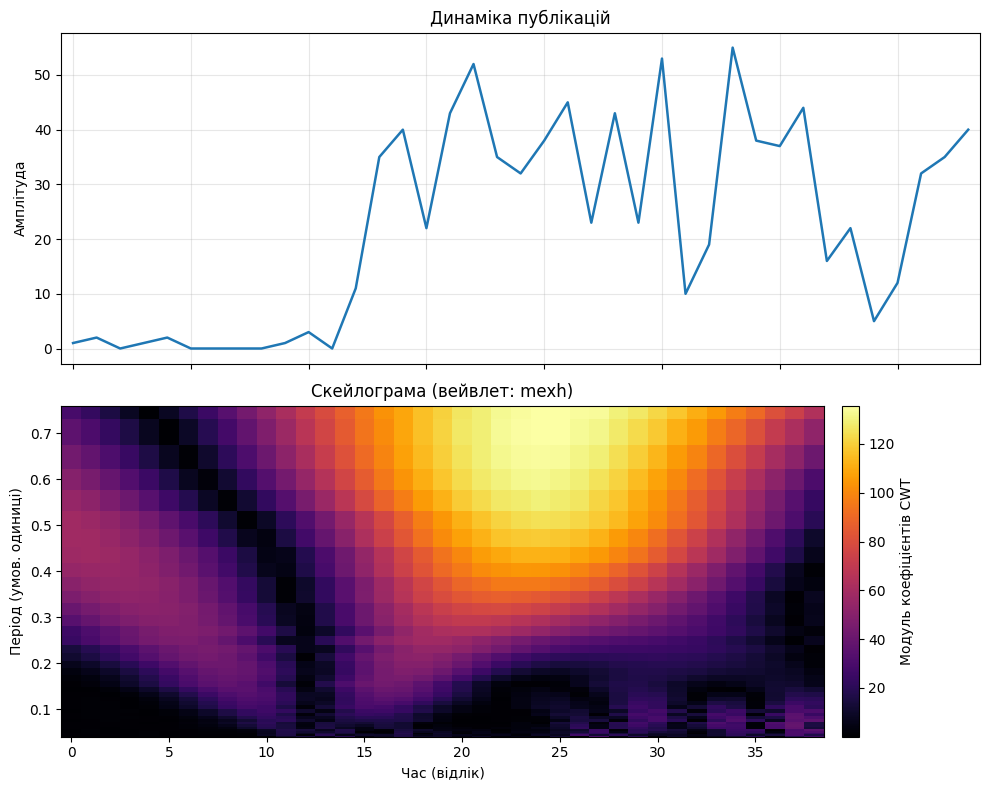

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Дані
x = np.array([1,2,0,1,2,0,0,0,0,1,3,0,11,35,40,22,43,52,35,32,
              38,45,23,43,23,53,10,19,55,38,37,44,16,22,5,12,32,35,40],
             dtype=float)
N = len(x)
t = np.arange(N)

# Параметри CWT
fs = 100.0
dt = 1.0 / fs
wavelet = 'mexh'

# Геометрична шкала краще відображає спектр
min_scale = 1
max_scale = max(2, N//2)
scales = np.geomspace(min_scale, max_scale, num=min(N-1, 64))

# Псевдочастоти та періоди для підписів
freqs = pywt.scale2frequency(wavelet, scales) / dt
periods = 1.0 / np.maximum(freqs, 1e-12)

# CWT
cwt, _ = pywt.cwt(x, scales, wavelet, sampling_period=dt)
power = np.abs(cwt)

# Візуалізація
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Сигнал
ax1.plot(t, x, lw=1.8)
ax1.set_title('Динаміка публікацій')
ax1.set_ylabel('Амплітуда')
ax1.grid(alpha=0.3)

# Скейлограма
pcm = ax2.pcolormesh(t, periods, power, shading='auto', cmap='inferno')
ax2.invert_yaxis()
ax2.set_ylim(periods.min(), min(periods.max(), 50))
ax2.set_ylabel('Період (умов. одиниці)')
ax2.set_xlabel('Час (відлік)')
ax2.set_title(f'Скейлограма (вейвлет: {wavelet})')

cbar = fig.colorbar(pcm, ax=ax2, pad=0.02)
cbar.set_label('Модуль коефіцієнтів CWT')

plt.tight_layout()
plt.show()


**Висновок:** візуалізація локальних особливостей у різних масштабах; яскраві області — сильна кореляція з базовим вейвлетом.